**STOCK PRICE PREDICTION using Machine Learning📈**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
data= quandl.get("NSE/TATAMOTORS")

In [4]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2003-12-26,435.80,440.5,431.65,438.85,438.60,1534637.0,6714.66
2003-12-29,441.00,449.7,441.00,448.40,447.80,2125952.0,9497.72
2003-12-30,450.00,451.9,430.10,444.85,442.40,2683293.0,11894.85
2003-12-31,446.00,459.3,443.55,452.10,452.05,4311596.0,19551.42
2004-01-01,453.25,457.9,451.50,454.00,454.45,2077604.0,9457.51


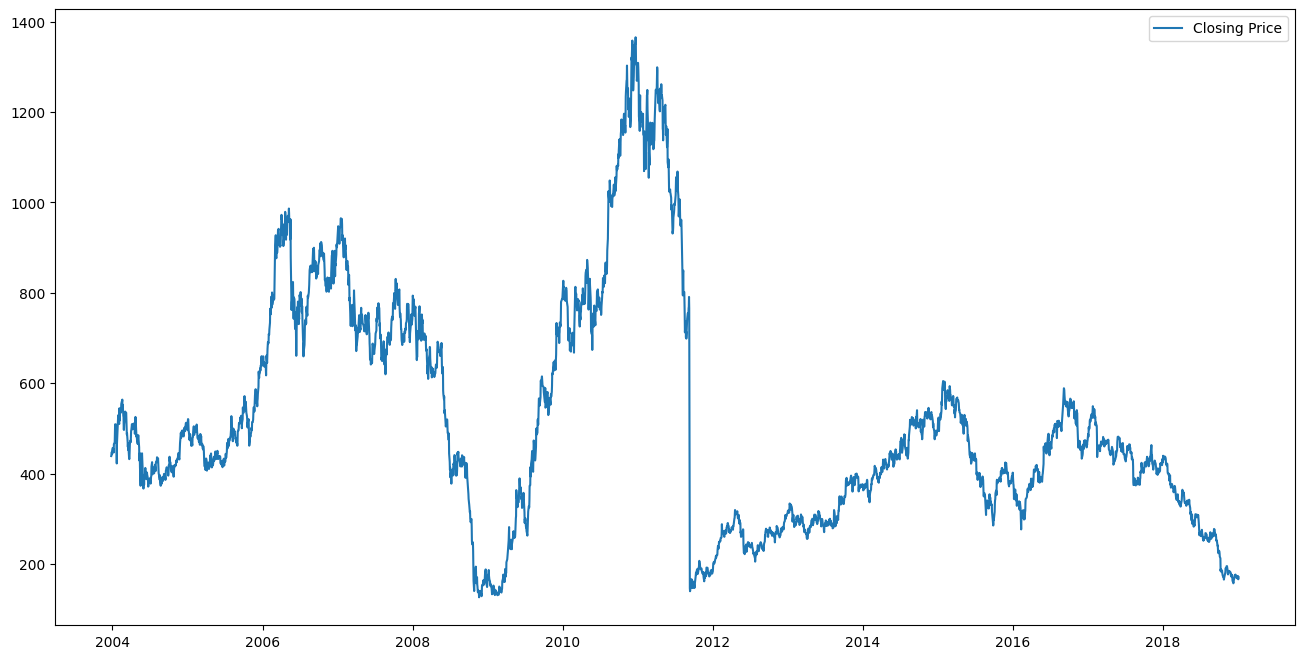

In [6]:
plt.figure(figsize=(16,8))
plt.plot(data["Close"],label='Closing Price')
plt.legend()

In [7]:
data['open - close']= data['Open'] - data['Close']
data['high - low']= data['High'] - data['Low']
data = data.dropna()

Input Feature to predict Whether Investors should Buy or Sell The stock.

In [8]:
x= data[['open - close','high - low']]

In [9]:
x.head()

,open - close,high - low
Date,,
2003-12-26,-2.80,8.85
2003-12-29,-6.80,8.70
2003-12-30,7.60,21.80
2003-12-31,-6.05,15.75
2004-01-01,-1.20,6.40


Intention is to store +1 for buy signal and -1 for the sell signal.The Target Variable is "Y" for Classification task




In [10]:
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [11]:
Y

array([ 1, -1,  1, ..., -1,  1, -1])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,Y,test_size=0.2,random_state=44)

Implementation of KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score #Fixed typo in module name

#using gridsearch to find the best parameter
param={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]} #Fixed typo in parameter name
knn= neighbors.KNeighborsClassifier()
model= GridSearchCV(knn,param,cv=5)

#fit the model
model.fit(x_train,y_train)
#Accuracy Score
accuracy_train = accuracy_score(y_train,model.predict(x_train))
accuracy_test = accuracy_score(y_test,model.predict(x_test))

print("Train_data Accuracy: %.2f"%accuracy_train) # Changed to string formatting
print("Test_data Accuracy: %.2f"%accuracy_test) # Changed to string formatting and corrected label

Train_data Accuracy: 0.59
Test_data Accuracy: 0.49


In [15]:
actual_predicted_data= pd.DataFrame({'Actual':y_test,'Predicted':model.predict(x_test)})

In [16]:
actual_predicted_data.head()

,Actual,Predicted
0,-1,-1
1,1,-1
2,1,-1
3,1,1
4,-1,-1


Regression Problem :KNN

In [17]:
# Check the column names available in the DataFrame
print(data.columns)

# Assuming the correct column name is 'Close', try:
y = data['Close']

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)', 'open - close', 'high - low'],
      dtype='object')


In [18]:
y

Date
2003-12-26    438.60
2003-12-29    447.80
2003-12-30    442.40
2003-12-31    452.05
2004-01-01    454.45
               ...  
2018-12-31    172.70
2019-01-01    173.45
2019-01-02    168.55
2019-01-03    166.05
2019-01-04    170.95
Name: Close, Length: 3734, dtype: float64

Implementation of KNN Regression

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score #Fixed typo in module name

x_train_reg,x_test_reg,y_train_reg,y_test_reg= train_test_split(x,y,test_size=0.2,random_state=44)

#using gridsearch to find the best parameter
param={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]} #Fixed typo in parameter name

#using gridsearch to find the best parameter
param={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]} #Fixed typo in parameter name
knn_reg= neighbors.KNeighborsRegressor()
model_reg= GridSearchCV(knn_reg,param,cv=5)

#fit the model
model_reg.fit(x_train_reg,y_train_reg)
prediction= model_reg.predict(x_test_reg)


In [20]:
print(prediction)

[426.93684211 380.76578947 707.79736842 574.3        298.96052632
 545.07368421 752.16315789 635.06842105 532.48421053 658.87368421
 874.64473684 739.65789474 523.36578947 725.16052632 311.04210526
 310.21315789 382.05526316 322.24473684 647.55789474 780.4
 433.01842105 345.62631579 419.94210526 529.60263158 291.05789474
 823.79210526 379.74473684 622.09473684 721.02894737 732.85526316
 814.91842105 421.06315789 448.87894737 488.10263158 416.37368421
 626.14736842 869.07894737 817.57368421 616.73684211 421.68947368
 330.91578947 426.51052632 303.31842105 705.34210526 693.99473684
 561.63684211 328.83947368 610.02368421 345.86578947 387.21315789
 649.96315789 891.68947368 619.22105263 487.25263158 515.83947368
 601.67105263 711.43947368 405.15526316 586.12631579 394.79736842
 635.75789474 371.78157895 651.92894737 323.67105263 367.71842105
 334.76052632 422.88421053 531.17368421 308.03684211 360.76578947
 405.22894737 418.55263158 341.43684211 521.76052632 399.8
 562.78421053 286.352631

In [21]:
#rmse
rms= np.sqrt(np.mean(np.power((np.array(y_test_reg)-np.array(prediction)),2)))
print(rms)
#

194.9613284334695


In [22]:
valid=pd.DataFrame({'Actual Close':y_test_reg,'Predicted Close':prediction})

In [23]:
valid.head(10)

,Actual Close,Predicted Close
Date,,
2004-10-14,406.70,426.936842
2008-11-24,133.30,380.765789
2007-11-13,693.30,707.797368
2008-12-18,173.65,574.300000
2013-02-07,288.60,298.960526
2010-02-18,709.85,545.073684
2008-10-10,292.35,752.163158
2009-08-13,473.05,635.068421
2015-11-10,407.45,532.484211
